# Techniques relating to SVD and text process(NLP)

## Collaborator: ZiJie Li, Xiang Li

In this notebook, we will use data from Mnist_784 and newspaper datasets to exercise the techniques relating to SVD and techniques to process text.

## Techniques relating to SVD

a) Fetch the "mnist_784" data and store is as a `.csv` In this way, I don't have to fetch it every time

In [3]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

import pandas as pd
import csv

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# your code here
df = pd.DataFrame(X)

df['Labels'] = y

df.to_csv("mnist.csv")
df.head()



,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


b) Plot the singular value plot for a single example of the 0 digit 

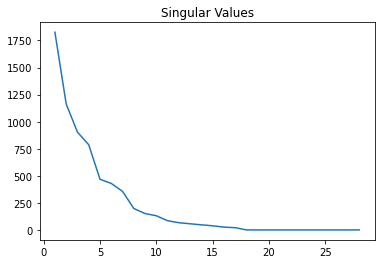

In [4]:
import numpy as np
Digit_zero_image = df.loc[df['Labels'] == "0"]

Digit_zero_image = Digit_zero_image[0:1].drop(columns=['Labels']).values.reshape(28,28)

U, s, VT=np.linalg.svd(Digit_zero_image)
plt.plot(range(1,len(s)+1),s)
plt.title("Singular Values")
plt.show()

c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. 

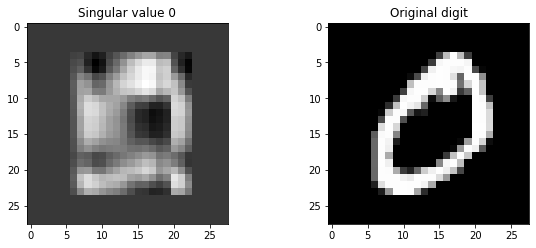

In [5]:
import matplotlib.cm as cm
scopy = s.copy()
scopy[2:] = 0.0

Zero_digit = U.dot(np.diag(scopy).dot(VT))
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(Zero_digit, cmap = cm.Greys_r)
plt.title('Singular value 0')
plt.subplot(1,2,2)
plt.imshow(Digit_zero_image, cmap = cm.Greys_r)
plt.title('Original digit')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. 

In [6]:
from numpy import random

Random = []
for i in range(100):
    random_generated_row = random.randint(70000)
    Random.append(random_generated_row)

New_df_random = pd.DataFrame([])
for m in Random:
    New_df_random = pd.concat([New_df_random,df[m:m+1]])
    
Original_Labels = New_df_random['Labels']
Random_drop_Labels = New_df_random.drop(columns='Labels')


SVD_DATA_list = []
for n in Random_drop_Labels.values:
    without_label_data = n.reshape(28,28)
    U,s,VT = np.linalg.svd(without_label_data)
    svd_data = U[ : , :7].dot(np.diag(s[:7]).dot(VT[ :7, :]))
    one_row_svd = svd_data.reshape(1,784)
    SVD_DATA_list.append(one_row_svd)

SVD_DATA_list = np.array(SVD_DATA_list).reshape(100,784)
new_df = pd.DataFrame(SVD_DATA_list)
new_df.to_csv("new_SVD_df.csv")


# Reason why I chose a particular rank. 

I choose to use rank of 7 because, from the plot in b, the singular value start to drop dramatically at the point of 7. By the way, I'm taking 100 rows from 70000 rows to this question and following questions.

e) Using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. 

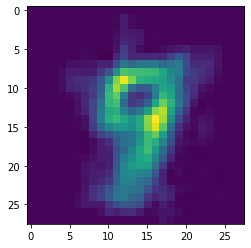

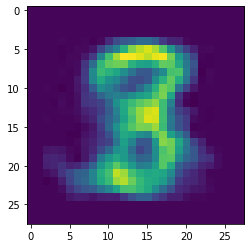

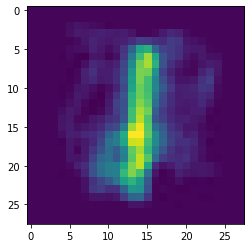

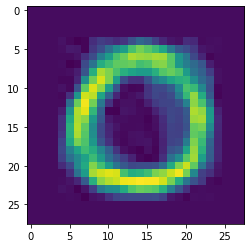

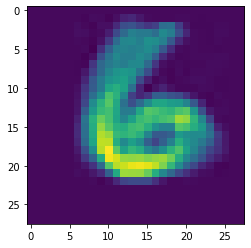

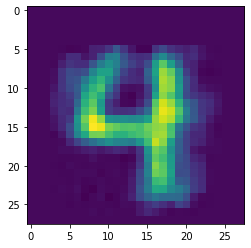

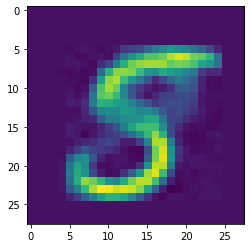

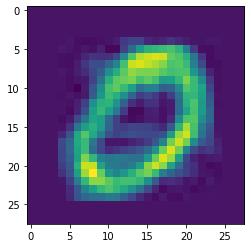

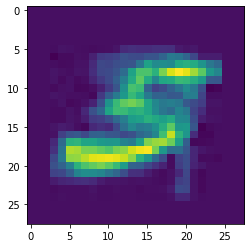

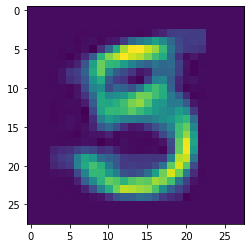

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(10)
fit = kmeans.fit(new_df)
label_SVD = fit.labels_
centroids_SVD = fit.cluster_centers_
center_list = []
for i in centroids_SVD:
     center_list.append(np.reshape(i,(28,28)))

def show_images(features_images,start, howmany):
    for i in range(start, start+howmany):
        plt.figure(i)
        plt.imshow(features_images[i])
    plt.show()
show_images(center_list, 0, 10)

f) Repeat e) on the original dataset  

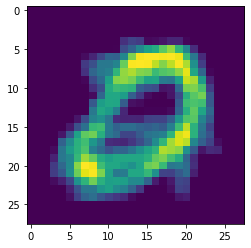

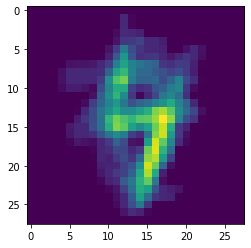

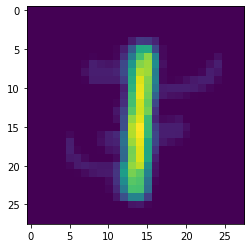

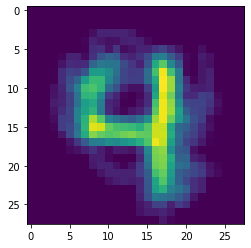

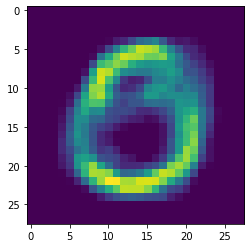

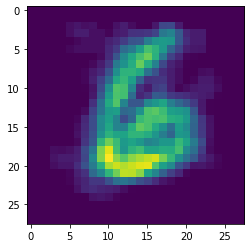

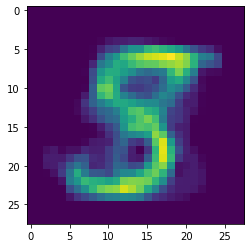

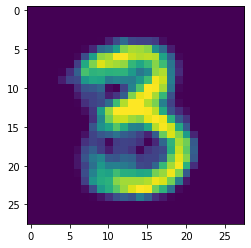

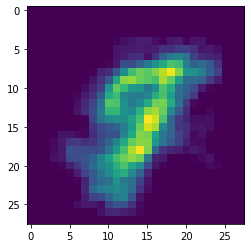

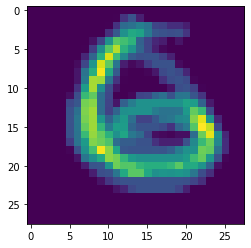

In [8]:
kmeans = KMeans(10)
fit = kmeans.fit(Random_drop_Labels)
label_original = fit.labels_
centroids_original = fit.cluster_centers_
center_list = []
for i in centroids_original:
     center_list.append(np.reshape(i,(28,28)))

def show_images(features_images,start, howmany):
    for i in range(start, start+howmany):
        plt.figure(i)
        plt.imshow(features_images[i])
    plt.show()
show_images(center_list, 0, 10)

g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels.

In [18]:
def disagreement_dist(P_labels, C_labels):
    disagreement_count = 0
    for i in range(len(P_labels)-1):
        for j in range(i+1,len(P_labels)):
            if (P_labels[i]!=P_labels[j] and C_labels[i]==C_labels[j]) or (P_labels[i]==P_labels[j] and C_labels[i]!=C_labels[j]):
                disagreement_count+=1
    return disagreement_count
    
Int_original_labels = []
for i in Original_Labels:
    Int_original_labels.append(int(i))

print("The disagreement distance between true labels of SVD and the clustering in e is ", disagreement_dist(label_SVD.tolist(), Int_original_labels))
print("The disagreement distance between true labels of Original labels and the clustering in f is ", disagreement_dist(label_original.tolist(),Int_original_labels))

The disagreement distance between true labels of SVD and the clustering in e is  620
The disagreement distance between true labels of Original labels and the clustering in f is  670


The disagreement distance between the labels after SVD and the clustering in e is smaller than that between the original labels and the clustering in f, that is saying the labels after SVD is more close to the kmeans approximation compare to the closeness of original labels and the kmeans approximation.

h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. 

In [10]:

rank_10_SVD_DATA_list = []

U,s,VT = np.linalg.svd(Random_drop_Labels)
rank10_svd_dataset = U[ : , :10].dot(np.diag(s[:10]).dot(VT[ :10, :]))
matrix = np.abs(Random_drop_Labels.values - rank10_svd_dataset)
print(matrix)


[[1.32330432e-12 7.22206941e-13 8.02761549e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.65785522e-13 4.80141238e-14 2.00546878e-14 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.95452101e-13 4.89094066e-13 1.29781724e-13 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.39334930e-13 5.14698305e-14 4.20139662e-15 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.56300578e-13 1.80811019e-14 4.39355806e-15 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.36229948e-13 2.34807565e-13 1.87145106e-13 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. 

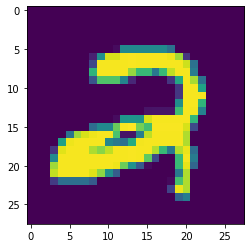

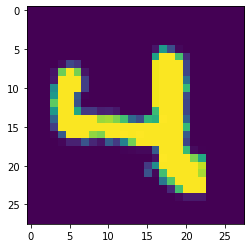

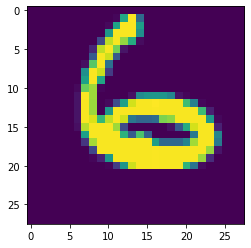

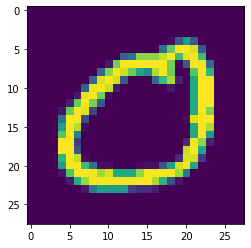

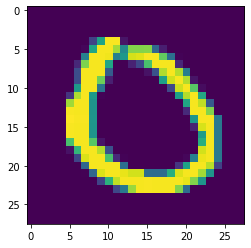

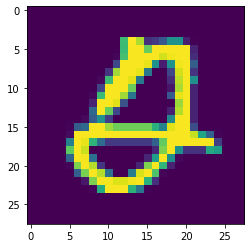

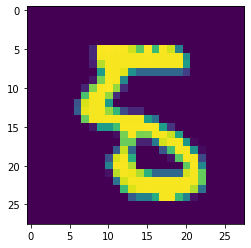

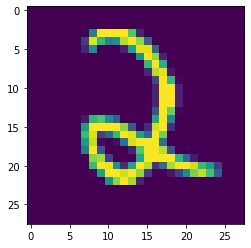

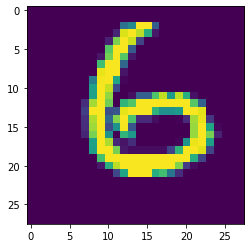

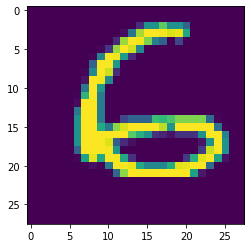

In [11]:
def euclid_dist(x, y):
    res = 0
    for i in range(len(x)):
        res += (x[i] - y[i])**2
    return res**(1/2)


def ten_largest_to(original):
    distances = []
    for i in range(100):
        training_record = rank10_svd_dataset[i]
        distances.append(
            {   
                "record": i,
                "dist": euclid_dist(training_record,list(original.iloc[i].values))
            }               
        )
    distances.sort(key= lambda x :x['dist'],reverse=True)
    return distances[:10]

index_list = []
for i in ten_largest_to(Random_drop_Labels):
    index_list.append(i['record'])

image_list = []
for s in index_list:
    image_list.append(Random_drop_Labels.iloc[s].values.reshape(28,28))

def show_images(features_images,start, howmany):
    for i in range(start, start+howmany):
        plt.figure(i)
        plt.imshow(features_images[i])
    plt.show()
show_images(image_list, 0, 10)


According to the theorem, the largest rows of O can be considered as anomalies, where O is denoted as A - A^k. In this question, the O is the difference between the original rows of the matrix and the SVD rows of the matrix. So, we can consider the largest 10 rows as anomalies. 

## Techniques relating to text process

a) Modify the code below to pick 4 categories of news articles 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import csv


categories = ['comp.sys.mac.hardware','rec.autos','rec.sport.baseball','talk.politics.guns'] # your categories here
news_data = fetch_20newsgroups(subset='train', categories=categories)
News_data_df = pd.DataFrame({'News':news_data.data,
                             'Target':news_data.target})

b) Using the `SnowballStemmer`, stem the words in every article

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def stem(text):
    return ' '.join([SnowballStemmer("english", ignore_stopwords=True).stem(word) for word in word_tokenize(text)])
News_data_df['Article'] = News_data_df['News'].fillna("").apply(stem)
News_data_df



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonathanzha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jonathanzha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,News,Target,Article
0,From: fcrary@ucsu.Colorado.EDU (Frank Crary)\n...,3,from : fcrari @ ucsu.colorado.edu ( frank crar...
1,From: nodine@lcs.mit.edu (Mark H. Nodine)\nSub...,0,from : nodin @ lcs.mit.edu ( mark h. nodin ) s...
2,From: f2ehg786@umiami.ir.miami.edu\nSubject: D...,0,from : f2ehg786 @ umiami.ir.miami.edu subject ...
3,From: philly@ravel.udel.edu (Robert C Hite)\nS...,2,from : philli @ ravel.udel.edu ( robert c hite...
4,From: kenney@tribe.b17d.ingr.COM (David Kenney...,2,from : kenney @ tribe.b17d.ingr.com ( david ke...
...,...,...,...
2310,From: PA146008@utkvm1.utk.edu (David Veal)\nSu...,3,from : pa146008 @ utkvm1.utk.edu ( david veal ...
2311,From: ccdarg@dct.ac.uk (Alan Greig)\nSubject: ...,3,from : ccdarg @ dct.ac.uk ( alan greig ) subje...
2312,From: jhunter@mta.ca (John Hunter)\nSubject: W...,2,from : jhunter @ mta.ca ( john hunter ) subjec...
2313,From: ljbartel@naomi.b23b.ingr.com (Les Bartel...,1,from : ljbartel @ naomi.b23b.ingr.com ( les ba...


c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers. Store the resulting dataset into a `.csv` file. 

In [16]:
import pandas as pd
import csv
vectorizer = TfidfVectorizer(max_df=.8,min_df=0.15).fit(News_data_df['Article'])
news_df = vectorizer.transform(News_data_df['Article'])
news_dataframe = pd.DataFrame(news_df.toarray(), columns=vectorizer.get_feature_names())
news_dataframe.to_csv("tfid stem articles.csv")

d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. 

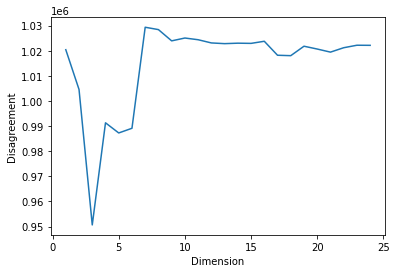

In [17]:
disagreement_distance = []
U,s,VT = np.linalg.svd(news_dataframe)
for k in range(1,25):
    dim_reduced_dataset = U[:, :k].dot(np.diag(s[:k]))
    kmeans = KMeans(4)
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_
    disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

plt.plot(range(1,25), disagreement_distance)
plt.ylabel('Disagreement')
plt.xlabel('Dimension')
plt.show()

The smallest disagreement distance of the article happens at the rank around 3. The highest disagreement distance of the article happens at the rank around 7. So, this is saying the kmean approximation is closest to the article after reducing the dimensionality of the tfidf vectorized data at the dimension of 3. 